## Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [2]:
from arcgis.gis import GIS
gis = GIS("home")

/opt/conda/lib/python3.9/site-packages/arcgis/gis/__init__.py:703: UserWarning: You are logged on as NBG_GIS with an administrator role, proceed with caution.
  warnings.warn(


#### Now you are ready to start!

<Item title:"Field Collections Data for Sharing" type:Feature Layer Collection owner:NBG_ConservationHorticulture>
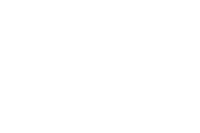

In [3]:
# Item Added From Toolbar
# Title: Field Collections Data for Sharing | Type: Feature Service | Owner: NBG_ConservationHorticulture
item = gis.content.get("53b1334df3614e97a82da7983569e20b")
item

In [7]:
from arcgis.gis import GIS
import pandas as pd
import datetime

# Connect to ArcGIS Online
gis = GIS("home")

# Function to fetch data from the ArcGIS Online feature layer
def fetch_data_from_layer(item):
    feature_layer = item.layers[0]  # Assuming the item is a feature layer
    query_result = feature_layer.query()
    return query_result.sdf

# Function to manipulate DataFrame
def manipulate_dataframe(df):
    relevant_columns = ['esrignss_latitude', 'esrignss_longitude', 'Date_Time', 'Species_Other', 'GlobalID']
    df = df[relevant_columns].copy()  # Make a copy to avoid altering original dataframe
    df['informationWithheld'] = 'y'
    df['basisOfRecord'] = 'HumanObservation'
    df.columns = ['decimalLatitude', 'decimalLongitude', 'eventDate', 'scientificName', 'occurrenceID', 'informationWithheld', 'basisOfRecord']
    df['eventDate'] = pd.to_datetime(df['eventDate']).dt.strftime('%m/%d/%Y')
    return df

# Function to export DataFrame to CSV
def export_to_csv(df, directory):
    # Generate filename with current date
    current_date = datetime.datetime.now().strftime('%Y-%m-%d')
    filename = f"{directory}/gbifdata_{current_date}.csv"
    df.to_csv(filename, index=False)

# Function to get GlobalIDs of previously exported records
def get_exported_globalids(filename):
    try:
        with open(filename, 'r') as f:
            exported_globalids = f.read().splitlines()
        return exported_globalids
    except FileNotFoundError:
        return []

# Function to save GlobalIDs of exported records
def save_exported_globalids(globalids, filename):
    with open(filename, 'a') as f:
        for globalid in globalids:
            f.write(globalid + '\n')

# Function to automate the process
def main():
    directory = "/arcgis/home/GBIF Data/Exports"  # Define the directory here
    item = gis.content.get("53b1334df3614e97a82da7983569e20b")  # Get the item by its ID
    exported_globalids_file = "/arcgis/home/GBIF Data/Global IDs/exported_globalids.txt"
    
    # Fetch data from the feature layer
    data = fetch_data_from_layer(item)
    
    # Filter out records that have already been exported
    exported_globalids = get_exported_globalids(exported_globalids_file)
    new_data = data[~data['GlobalID'].isin(exported_globalids)]
    
    if not new_data.empty:
        # Manipulate the DataFrame
        processed_data = manipulate_dataframe(new_data)
        
        # Export processed data to CSV
        export_to_csv(processed_data, directory)
        
        # Save GlobalIDs of exported records
        save_exported_globalids(new_data['GlobalID'].tolist(), exported_globalids_file)

# Call the main function
main()

/opt/conda/lib/python3.9/site-packages/arcgis/gis/__init__.py:703: UserWarning: You are logged on as NBG_GIS with an administrator role, proceed with caution.
  warnings.warn(
